# 물탱크


1. 물탱크 모델링

In [42]:
import matplotlib.pyplot as plt

In [43]:
def initial_water_tank():
    water_tank_initial_high = 10                                  # 초기 물탱크 높이 [m]
    water_tank_area = 5 * 5 * 3.14                                # 반지름 * 반지름 * 3.14[m^2]
    water_tank_voulum = water_tank_initial_high * water_tank_area # 물탱크 초기 부피

    water_leak_size = 0.05                                         # 물의 손실 정도 0.5 [m^3]
    return water_tank_voulum, water_leak_size

1.1. 물탱크의 수위가 어떻게 변화하는지 확인

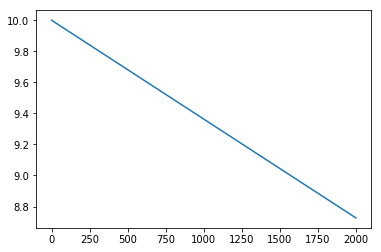

In [44]:
water_tank_voulum, water_leak_size = initial_water_tank()     # 물탱크 초기화

history_level = []
for i in range(2000):                                         # 1000초 정도 수행
    current_level = water_tank_voulum / water_tank_area       # 현재 물탱크 수위를 저장
    history_level.append(current_level)                       # 각 초마다 물탱크의 수위변화를 저장
    water_tank_voulum -= water_leak_size                      # 물탱크의 물이 조금씩 손실됨
plt.plot(history_level)
plt.show()

1.2 수위가 빠지는 정도를 높이에 따라서 달라지게 모델링

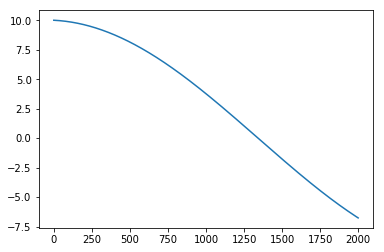

In [45]:
water_tank_voulum, water_leak_size = initial_water_tank()     # 물탱크 초기화

history_level = []
for i in range(2000):                                         # 1000초 정도 수행
    current_level = water_tank_voulum / water_tank_area       # 현재 물탱크 수위를 저장
    
    water_leak_size += (current_level/10000)                   # 높이가 낮아 질 수록 물의 손실이 적음
    
    history_level.append(current_level)                       # 각 초마다 물탱크의 수위변화를 저장
    water_tank_voulum -= water_leak_size                      # 물탱크의 물이 조금씩 손실됨
plt.plot(history_level)
plt.show()

1.3 수위가 0인 경우 현재 수위는 0으로 표기하도록 모델 수정

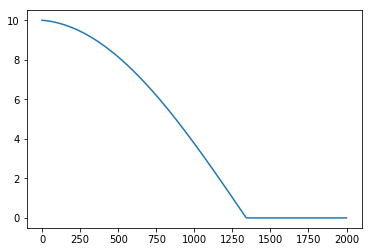

In [92]:
water_tank_voulum, water_leak_size = initial_water_tank()     # 물탱크 초기화

history_level = []
for i in range(2000):                                         # 2000초 정도 수행
    current_level = water_tank_voulum / water_tank_area       # 현재 물탱크 수위를 저장
    
    current_level = 0 if current_level <= 0 else current_level # 수위가 0보다 낮으면 0으로 전환
    
    water_leak_size += (current_level/10000)                   # 높이가 낮아 질 수록 물의 손실이 적음
    
    history_level.append(current_level)                       # 각 초마다 물탱크의 수위변화를 저장
    water_tank_voulum -= water_leak_size                      # 물탱크의 물이 조금씩 손실됨
plt.plot(history_level)
plt.show()

2. 제어기 설치

2.1 if_then 제어기 설치

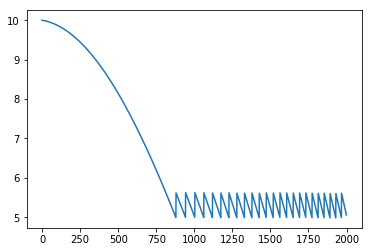

In [107]:
water_tank_voulum, water_leak_size = initial_water_tank()     # 물탱크 초기화

set_point = 5

history_level = []
for i in range(2000):                                         # 2000초 정도 수행
    current_level = water_tank_voulum / water_tank_area       # 현재 물탱크 수위를 저장
    
    current_level = 0 if current_level <= 0 else current_level # 수위가 0보다 낮으면 0으로 전환
    
    # 벨브 모델링
    if current_level < set_point:
        water_tank_voulum += 50
    
    water_leak_size += (current_level/10000)                   # 높이가 낮아 질 수록 물의 손실이 적음
    
    history_level.append(current_level)                       # 각 초마다 물탱크의 수위변화를 저장
    water_tank_voulum -= water_leak_size                      # 물탱크의 물이 조금씩 손실됨
plt.plot(history_level)
plt.show()

2.1.1 벨브를 세부적으로 모델링

In [109]:
def valve(valve_state, condition):
    if condition: # True : setpoint보다 수위가 낮은 상태 벨브 open 신호
        valve_state += 5
        if valve_state >= 50:
            return 50
        else:
            return valve_state
    else: # True : setpoint보다 수위가 낮은 상태 벨브 open 신호
        

SyntaxError: unexpected EOF while parsing (<ipython-input-109-bed6399cf67d>, line 9)

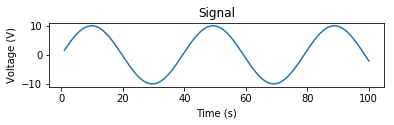

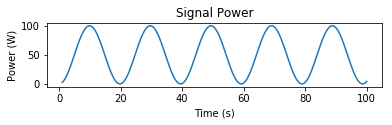

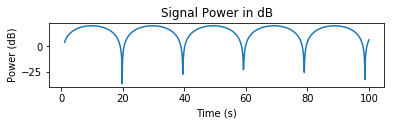

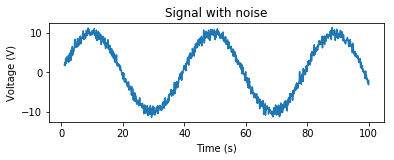

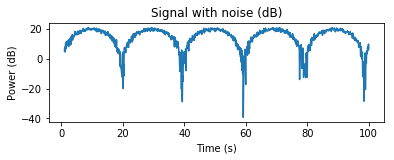

In [111]:
# Signal Generation
# matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 1000)
x_volts = 10*np.sin(t/(2*np.pi))
plt.subplot(3,1,1)
plt.plot(t, x_volts)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

x_watts = x_volts ** 2
plt.subplot(3,1,2)
plt.plot(t, x_watts)
plt.title('Signal Power')
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.show()

x_db = 10 * np.log10(x_watts)
plt.subplot(3,1,3)
plt.plot(t, x_db)
plt.title('Signal Power in dB')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()
# Adding noise using target SNR

# Set a target SNR
target_snr_db = 20
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
y_volts = x_volts + noise_volts

# Plot signal with noise
plt.subplot(2,1,1)
plt.plot(t, y_volts)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()
# Plot in dB
y_watts = y_volts ** 2
y_db = 10 * np.log10(y_watts)
plt.subplot(2,1,2)
plt.plot(t, 10* np.log10(y_volts**2))
plt.title('Signal with noise (dB)')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()